# EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
h_data = pd.read_csv('heart.csv')
s_data= pd.read_csv('o2Saturation.csv')

## 1. Data Shape

In [3]:
h_data.shape

(303, 14)

There are 303 instances and 14 attributes.

In [4]:
s_data.shape

(3585, 1)

In the O2 Saturation CSV file, there are 3585 records and 1 attribute.

## 2. Data Type and Missing Value Investigation

In [5]:
h_data.info()
h_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Every attribute is numerical, either as an integer or a float. There are no missing values.

In [6]:
s_data.info()
s_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


98.6    0
dtype: int64

In the O2_Saturation data, there are no missing values.

In [7]:
h_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
s_data.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


## 3. Distribution of Attributes

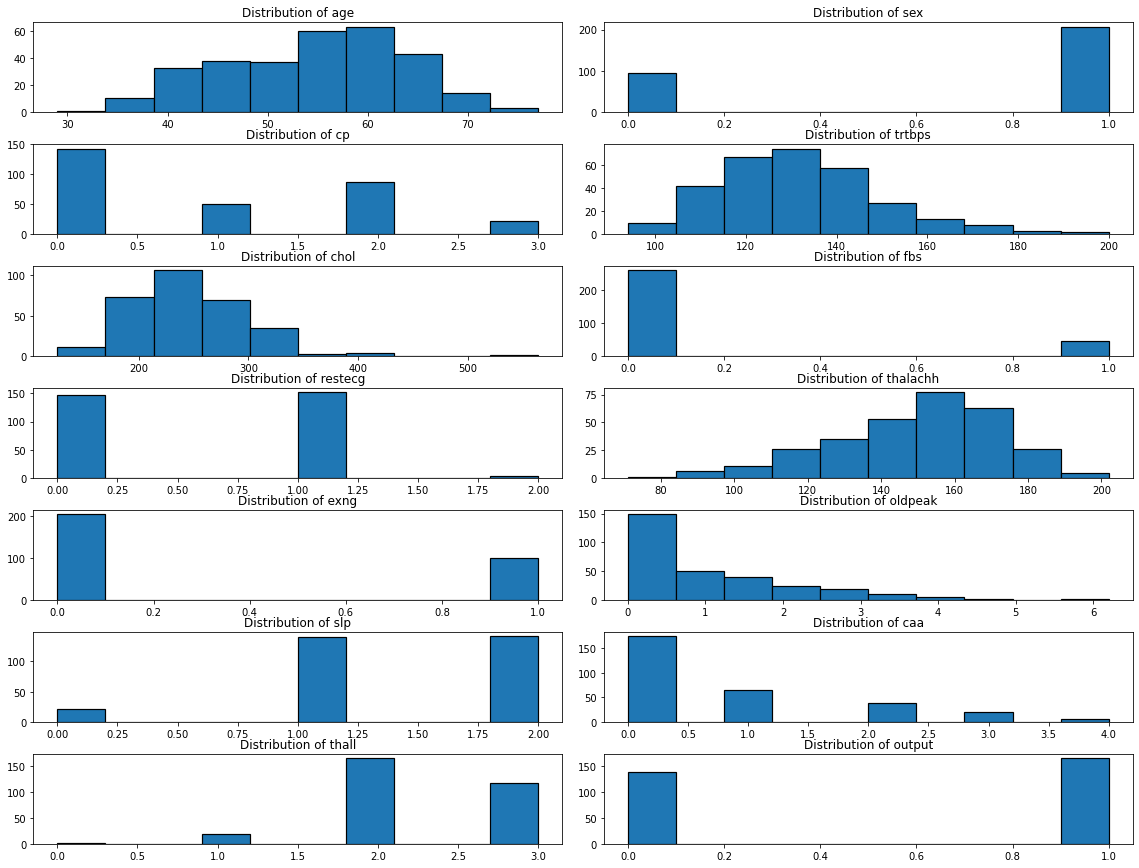

In [9]:
fig, axes = plt.subplots(7, 2, figsize=(16,12))
fig.tight_layout()

row = 7
column = 2
plotnum = 1

for col in h_data.columns:
    plt.subplot(row, column, plotnum)
    plt.hist(h_data[col], edgecolor='black', linewidth=1.2)
    plt.title("Distribution of %s" % col)
    plotnum += 1
    
plt.show()

### Closer Look at Attributes of Interest

In [10]:
 h_data.age.value_counts().head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

Text(0.5, 1.0, 'Histogram of Age')

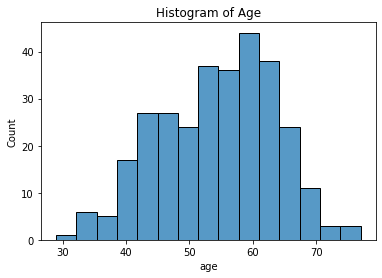

In [11]:
sns.histplot(h_data.age, bins = 15)
plt.title("Histogram of Age")

Text(0.5, 0, 'Resting Blood Pressure (mm Hg)')

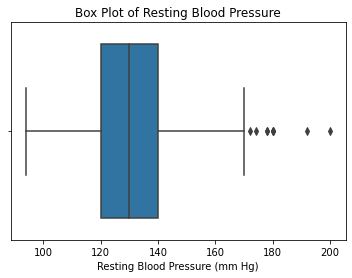

In [12]:
sns.boxplot(x=h_data["trtbps"])
plt.title("Box Plot of Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure (mm Hg)")

In [13]:
# Measure of skewness and kurtosis for Resting Blood Pressure
h_data['trtbps'].agg(['skew', 'kurtosis']).transpose()

skew        0.713768
kurtosis    0.929054
Name: trtbps, dtype: float64

In [14]:
s_data.value_counts().head()

98.6
98.6    1661
97.5     704
97.6     579
99.6     359
96.5     104
dtype: int64

Text(0.5, 1.0, 'Distribution of O2 Saturation Data')

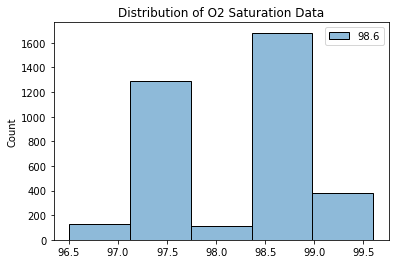

In [15]:
sns.histplot(s_data, bins = 5)
plt.title("Distribution of O2 Saturation Data")

### 4. Correlation Between Attributes

In [18]:
CorrMAt = h_data.corr()

Text(0.5, 1.0, 'Correlation Heatmap of Attributes')

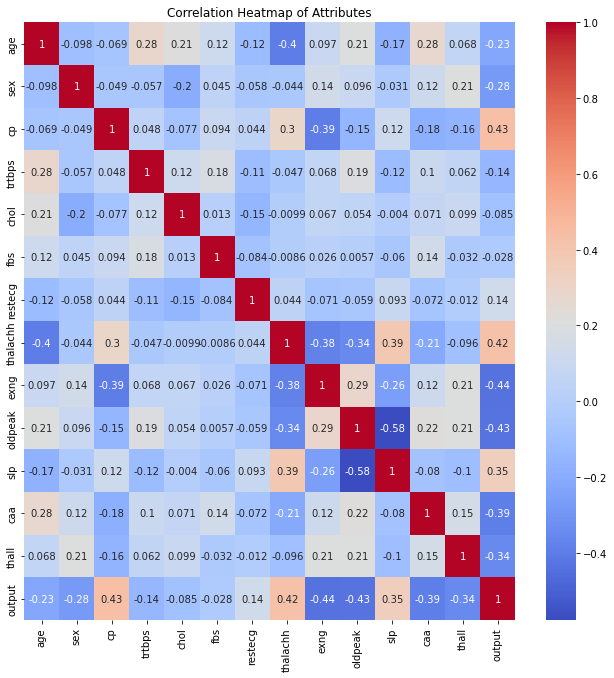

In [19]:
plt.figure(figsize = (11,11))
sns.heatmap(CorrMAt, annot = True, cmap= 'coolwarm')
plt.title("Correlation Heatmap of Attributes")

The strongest degrees of correlation are -0.58, between slp and oldpeak, and 0.43, between cp (chest pain type) and output (probability of a heart attack). These correlation values represent a moderate linear relationship. Because the correlation coefficient values between the attributes are low, issues of multicollinearity are not a concern.